In [1]:
# load csv and display data frame
import pandas as pd
import csv
data = pd.read_csv('cleaned.csv')
print(data.head(10))

  Brand Name                Phone Name Display           Chipset  Battery  \
0      Apple  iPhone 15 Pro Max 1024GB    6.7″     Apple A17 Pro     4441   
1      Apple   iPhone 15 Pro Max 512GB    6.7″     Apple A17 Pro     4441   
2      Apple   iPhone 15 Pro Max 256GB    6.7″     Apple A17 Pro     4441   
3      Apple      iPhone 15 Pro 1024GB    6.1″     Apple A17 Pro     3274   
4      Apple       iPhone 15 Pro 512GB    6.1″     Apple A17 Pro     3274   
5      Apple       iPhone 15 Pro 256GB    6.1″     Apple A17 Pro     3274   
6      Apple      iPhone 15 Plus 512GB    6.7″  Apple A16 Bionic     4383   
7      Apple      iPhone 15 Plus 256GB    6.7″  Apple A16 Bionic     4383   
8      Apple      iPhone 15 Plus 128GB    6.7″  Apple A16 Bionic     4383   
9      Apple           iPhone 15 512GB    6.1″  Apple A16 Bionic     3349   

  Storage (GB)  RAM (GB) Price  Camera Max MP  
0       1024GB       8.0  1599           48.0  
1        512GB       8.0  1399           48.0  
2       

In [17]:
data.head()

,Brand Name,Phone Name,Display,Chipset,Battery,Storage (GB),RAM (GB),Price,Camera Max MP,Chipset_Brand
0,Apple,iPhone 15 Pro Max 1024GB,6.7,Apple A17 Pro,4441,1024.0,8.0,1599.0,48.0,Apple
1,Apple,iPhone 15 Pro Max 512GB,6.7,Apple A17 Pro,4441,512.0,8.0,1399.0,48.0,Apple
2,Apple,iPhone 15 Pro Max 256GB,6.7,Apple A17 Pro,4441,256.0,8.0,1199.0,48.0,Apple
3,Apple,iPhone 15 Pro 1024GB,6.1,Apple A17 Pro,3274,1024.0,8.0,1399.0,48.0,Apple
4,Apple,iPhone 15 Pro 512GB,6.1,Apple A17 Pro,3274,512.0,8.0,1199.0,48.0,Apple


In [2]:
# remove '″' character from the 'Display' column and convert the values to float
data['Display'] = data['Display'].str.replace('″', '').astype(float)

# remove 'GB' string from the 'Storage (GB)' column and convert the values to float
data['Storage (GB)'] = data['Storage (GB)'].str.replace('GB', '').astype(float)

# remove currency symbols and convert the values to float
data['Price'] = data['Price'].replace('[\$,€,£]', '', regex=True).astype(float)

print(data.head())

  Brand Name                Phone Name  Display        Chipset  Battery  \
0      Apple  iPhone 15 Pro Max 1024GB      6.7  Apple A17 Pro     4441   
1      Apple   iPhone 15 Pro Max 512GB      6.7  Apple A17 Pro     4441   
2      Apple   iPhone 15 Pro Max 256GB      6.7  Apple A17 Pro     4441   
3      Apple      iPhone 15 Pro 1024GB      6.1  Apple A17 Pro     3274   
4      Apple       iPhone 15 Pro 512GB      6.1  Apple A17 Pro     3274   

   Storage (GB)  RAM (GB)   Price  Camera Max MP  
0        1024.0       8.0  1599.0           48.0  
1         512.0       8.0  1399.0           48.0  
2         256.0       8.0  1199.0           48.0  
3        1024.0       8.0  1399.0           48.0  
4         512.0       8.0  1199.0           48.0  


In [3]:
# create a new column 'Chipset_Brand' and initialize it with 'Other' as default value
data['Chipset_Brand'] = 'Other'

# define a dictionary 'chipset_keywords' containing chipset brands and their respective keywords
chipset_keywords = {
    'Apple': ['Apple'],
    'Google': ['Google Tensor'],
    'Exynos': ['Exynos'],
    'Snapdragon': ['Snapdragon'],
    'Dimensity': ['Dimensity'],
    'Helio': ['Helio'],
    'MT': ['MT'],
    'Nvidia': ['Nvidia'],
    'Unisoc': ['Unisoc']
}

# Iterate through the 'chipset_keywords' dictionary
for brand, keywords in chipset_keywords.items():
    # Iterate through the list of keywords for each brand
    for keyword in keywords:
        data.loc[data['Chipset'].str.contains(keyword), 'Chipset_Brand'] = brand


print(data['Chipset_Brand'].value_counts())

Chipset_Brand
Snapdragon    121
Apple          63
Dimensity      43
Exynos         29
Google         22
MT             20
Helio          15
Other           3
Nvidia          2
Unisoc          2
Name: count, dtype: int64


In [4]:
# Use pd.get_dummies() to perform one-hot encoding on the 'Chipset_Brand' column
# This creates binary columns for each unique value in 'Chipset_Brand'
df_encoded = pd.get_dummies(data, columns=['Chipset_Brand'])

# Print the first few rows of the encoded DataFrame
print(df_encoded.head())

  Brand Name                Phone Name  Display        Chipset  Battery  \
0      Apple  iPhone 15 Pro Max 1024GB      6.7  Apple A17 Pro     4441   
1      Apple   iPhone 15 Pro Max 512GB      6.7  Apple A17 Pro     4441   
2      Apple   iPhone 15 Pro Max 256GB      6.7  Apple A17 Pro     4441   
3      Apple      iPhone 15 Pro 1024GB      6.1  Apple A17 Pro     3274   
4      Apple       iPhone 15 Pro 512GB      6.1  Apple A17 Pro     3274   

   Storage (GB)  RAM (GB)   Price  Camera Max MP  Chipset_Brand_Apple  \
0        1024.0       8.0  1599.0           48.0                 True   
1         512.0       8.0  1399.0           48.0                 True   
2         256.0       8.0  1199.0           48.0                 True   
3        1024.0       8.0  1399.0           48.0                 True   
4         512.0       8.0  1199.0           48.0                 True   

   Chipset_Brand_Dimensity  Chipset_Brand_Exynos  Chipset_Brand_Google  \
0                    False          

In [18]:
df_encoded.head()

,Brand Name,Phone Name,Display,Chipset,Battery,Storage (GB),RAM (GB),Price,Camera Max MP,Chipset_Brand_Apple,Chipset_Brand_Dimensity,Chipset_Brand_Exynos,Chipset_Brand_Google,Chipset_Brand_Helio,Chipset_Brand_MT,Chipset_Brand_Nvidia,Chipset_Brand_Other,Chipset_Brand_Snapdragon,Chipset_Brand_Unisoc
0,Apple,iPhone 15 Pro Max 1024GB,-0.152383,Apple A17 Pro,-0.241477,2.835724,-0.037408,1599.0,-0.033249,True,False,False,False,False,False,False,False,False,False
1,Apple,iPhone 15 Pro Max 512GB,-0.152383,Apple A17 Pro,-0.241477,0.849554,-0.037408,1399.0,-0.033249,True,False,False,False,False,False,False,False,False,False
2,Apple,iPhone 15 Pro Max 256GB,-0.152383,Apple A17 Pro,-0.241477,-0.143532,-0.037408,1199.0,-0.033249,True,False,False,False,False,False,False,False,False,False
3,Apple,iPhone 15 Pro 1024GB,-0.468956,Apple A17 Pro,-0.898871,2.835724,-0.037408,1399.0,-0.033249,True,False,False,False,False,False,False,False,False,False
4,Apple,iPhone 15 Pro 512GB,-0.468956,Apple A17 Pro,-0.898871,0.849554,-0.037408,1199.0,-0.033249,True,False,False,False,False,False,False,False,False,False


In [5]:
from sklearn.preprocessing import StandardScaler

# Define the numeric features to be scaled
numeric_features = ['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP']

scaler = StandardScaler()

# Use the scaler to standardize (scale) the numeric features
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print(df_encoded.head())

  Brand Name                Phone Name   Display        Chipset   Battery  \
0      Apple  iPhone 15 Pro Max 1024GB -0.152383  Apple A17 Pro -0.241477   
1      Apple   iPhone 15 Pro Max 512GB -0.152383  Apple A17 Pro -0.241477   
2      Apple   iPhone 15 Pro Max 256GB -0.152383  Apple A17 Pro -0.241477   
3      Apple      iPhone 15 Pro 1024GB -0.468956  Apple A17 Pro -0.898871   
4      Apple       iPhone 15 Pro 512GB -0.468956  Apple A17 Pro -0.898871   

   Storage (GB)  RAM (GB)   Price  Camera Max MP  Chipset_Brand_Apple  \
0      2.835724 -0.037408  1599.0      -0.033249                 True   
1      0.849554 -0.037408  1399.0      -0.033249                 True   
2     -0.143532 -0.037408  1199.0      -0.033249                 True   
3      2.835724 -0.037408  1399.0      -0.033249                 True   
4      0.849554 -0.037408  1199.0      -0.033249                 True   

   Chipset_Brand_Dimensity  Chipset_Brand_Exynos  Chipset_Brand_Google  \
0                    Fal

In [6]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder with parameters for desired behavior
encoder = OneHotEncoder(sparse=False, drop='first')

# Define the categorical features to be one-hot encoded
categorical_features = ['Brand Name', 'Chipset']
encoded_features = encoder.fit_transform(df_encoded[categorical_features])

# Retrieve the feature names for the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame from the encoded features with appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the original DataFrame without categorical features and the encoded DataFrame
df_encoded_final = df_encoded.drop(columns=categorical_features).reset_index(drop=True)
df_encoded_final = pd.concat([df_encoded_final, encoded_df], axis=1)

df_encoded_final.head()

/Users/briannehan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Phone Name,Display,Battery,Storage (GB),RAM (GB),Price,Camera Max MP,Chipset_Brand_Apple,Chipset_Brand_Dimensity,Chipset_Brand_Exynos,...,Chipset_Snapdragon 8 Gen 2,Chipset_Snapdragon 8 Gen 3,Chipset_Snapdragon 8+ Gen 1,Chipset_Snapdragon 821,Chipset_Snapdragon 835,Chipset_Snapdragon 845,Chipset_Snapdragon 855,Chipset_Snapdragon 870 5G,Chipset_Snapdragon W5+ Gen 1,Chipset_Unisoc UMS512 T618
0,iPhone 15 Pro Max 1024GB,-0.152383,-0.241477,2.835724,-0.037408,1599.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,iPhone 15 Pro Max 512GB,-0.152383,-0.241477,0.849554,-0.037408,1399.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,iPhone 15 Pro Max 256GB,-0.152383,-0.241477,-0.143532,-0.037408,1199.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,iPhone 15 Pro 1024GB,-0.468956,-0.898871,2.835724,-0.037408,1399.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,iPhone 15 Pro 512GB,-0.468956,-0.898871,0.849554,-0.037408,1199.0,-0.033249,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(df_encoded_final.columns)

Index(['Phone Name', 'Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Price',
       'Camera Max MP', 'Chipset_Brand_Apple', 'Chipset_Brand_Dimensity',
       'Chipset_Brand_Exynos', 'Chipset_Brand_Google', 'Chipset_Brand_Helio',
       'Chipset_Brand_MT', 'Chipset_Brand_Nvidia', 'Chipset_Brand_Other',
       'Chipset_Brand_Snapdragon', 'Chipset_Brand_Unisoc', 'Brand Name_Google',
       'Brand Name_Samsung', 'Brand Name_Xiaomi', 'Chipset_5100',
       'Chipset_Apple A13 Bionic', 'Chipset_Apple A14 Bionic',
       'Chipset_Apple A15 Bionic', 'Chipset_Apple A16 Bionic',
       'Chipset_Apple A17 Pro', 'Chipset_Dimensity 1080',
       'Chipset_Dimensity 6080', 'Chipset_Dimensity 6100+',
       'Chipset_Dimensity 7200 Ultra', 'Chipset_Dimensity 8200 Ultra',
       'Chipset_Dimensity 8300 Ultra', 'Chipset_Dimensity 9200+',
       'Chipset_Exynos 1280', 'Chipset_Exynos 1330', 'Chipset_Exynos 138',
       'Chipset_Exynos 1380', 'Chipset_Exynos 1480', 'Chipset_Exynos 2200',
       'Chipset_

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define features (X) and target variable (y)
X = df_encoded_final.drop(columns=['Phone Name', 'Price'])
y = df_encoded_final['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator (model) from the grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


In [9]:
# Define the features for the new phone entry
new_phone = pd.DataFrame({
    'Brand Name': ['Apple'],
    'Chipset': ['Apple A15 Bionic'],
    'Display': [6.1],
    'Battery': [3500],
    'Storage (GB)': [256],
    'RAM (GB)': [8],
    'Camera Max MP': [48]
})

# Perform one-hot encoding for 'Brand Name' and 'Chipset' columns
brand_one_hot = pd.get_dummies(new_phone['Brand Name'], prefix='Brand Name')
chipset_one_hot = pd.get_dummies(new_phone['Chipset'], prefix='Chipset')

# Concatenate the encoded features with the original DataFrame and drop the original categorical columns
new_phone_preprocessed = pd.concat([new_phone.drop(['Brand Name', 'Chipset'], axis=1), brand_one_hot, chipset_one_hot], axis=1)

# Reindex the DataFrame to match the column order of the training data and fill missing columns with 0
new_phone_preprocessed = new_phone_preprocessed.reindex(columns=X_train.columns, fill_value=0)

# Make a price prediction using the trained Random Forest model
price_prediction = best_rf.predict(new_phone_preprocessed)

print(f"Predicted Price: {price_prediction[0]}")

Predicted Price: 1112.9666666666667


In [19]:
new_phone = pd.DataFrame({
    'Brand Name': ['Apple'],
    'Chipset': ['Apple A17 Pro'],
    'Display': [6.7],
    'Battery': [4441],
    'Storage (GB)': [1024],
    'RAM (GB)': [8],
    'Camera Max MP': [48]
})

brand_one_hot = pd.get_dummies(new_phone['Brand Name'], prefix='Brand Name')
chipset_one_hot = pd.get_dummies(new_phone['Chipset'], prefix='Chipset')

new_phone_preprocessed = pd.concat([new_phone.drop(['Brand Name', 'Chipset'], axis=1), brand_one_hot, chipset_one_hot], axis=1)
new_phone_preprocessed = new_phone_preprocessed.reindex(columns=X_train.columns, fill_value=0)

numeric_features = ['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP']
new_phone_preprocessed[numeric_features] = scaler.transform(new_phone_preprocessed[numeric_features])

price_prediction = best_rf.predict(new_phone_preprocessed)
print(f"Predicted Price: {price_prediction[0]}")

Predicted Price: 1259.8166666666666


In [20]:
new_phone = pd.DataFrame({
    'Brand Name': ['Apple'],
    'Chipset': ['Apple A17 Pro'],
    'Display': [6.7],
    'Battery': [4441],
    'Storage (GB)': [128],
    'RAM (GB)': [8],
    'Camera Max MP': [48]
})

brand_one_hot = pd.get_dummies(new_phone['Brand Name'], prefix='Brand Name')
chipset_one_hot = pd.get_dummies(new_phone['Chipset'], prefix='Chipset')

new_phone_preprocessed = pd.concat([new_phone.drop(['Brand Name', 'Chipset'], axis=1), brand_one_hot, chipset_one_hot], axis=1)
new_phone_preprocessed = new_phone_preprocessed.reindex(columns=X_train.columns, fill_value=0)

numeric_features = ['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP']
new_phone_preprocessed[numeric_features] = scaler.transform(new_phone_preprocessed[numeric_features])

price_prediction = best_rf.predict(new_phone_preprocessed)
print(f"Predicted Price: {price_prediction[0]}")

Predicted Price: 851.6666666666666


In [21]:
import pickle

with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

with open('model_columns.pkl', 'wb') as columns_file:
    pickle.dump(X_train.columns, columns_file)
    
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [10]:
print(new_phone_preprocessed.columns)
print(X_train.columns)

Index(['Display', 'Battery', 'Storage (GB)', 'RAM (GB)', 'Camera Max MP',
       'Chipset_Brand_Apple', 'Chipset_Brand_Dimensity',
       'Chipset_Brand_Exynos', 'Chipset_Brand_Google', 'Chipset_Brand_Helio',
       'Chipset_Brand_MT', 'Chipset_Brand_Nvidia', 'Chipset_Brand_Other',
       'Chipset_Brand_Snapdragon', 'Chipset_Brand_Unisoc', 'Brand Name_Google',
       'Brand Name_Samsung', 'Brand Name_Xiaomi', 'Chipset_5100',
       'Chipset_Apple A13 Bionic', 'Chipset_Apple A14 Bionic',
       'Chipset_Apple A15 Bionic', 'Chipset_Apple A16 Bionic',
       'Chipset_Apple A17 Pro', 'Chipset_Dimensity 1080',
       'Chipset_Dimensity 6080', 'Chipset_Dimensity 6100+',
       'Chipset_Dimensity 7200 Ultra', 'Chipset_Dimensity 8200 Ultra',
       'Chipset_Dimensity 8300 Ultra', 'Chipset_Dimensity 9200+',
       'Chipset_Exynos 1280', 'Chipset_Exynos 1330', 'Chipset_Exynos 138',
       'Chipset_Exynos 1380', 'Chipset_Exynos 1480', 'Chipset_Exynos 2200',
       'Chipset_Exynos 850', 'Chipset_E

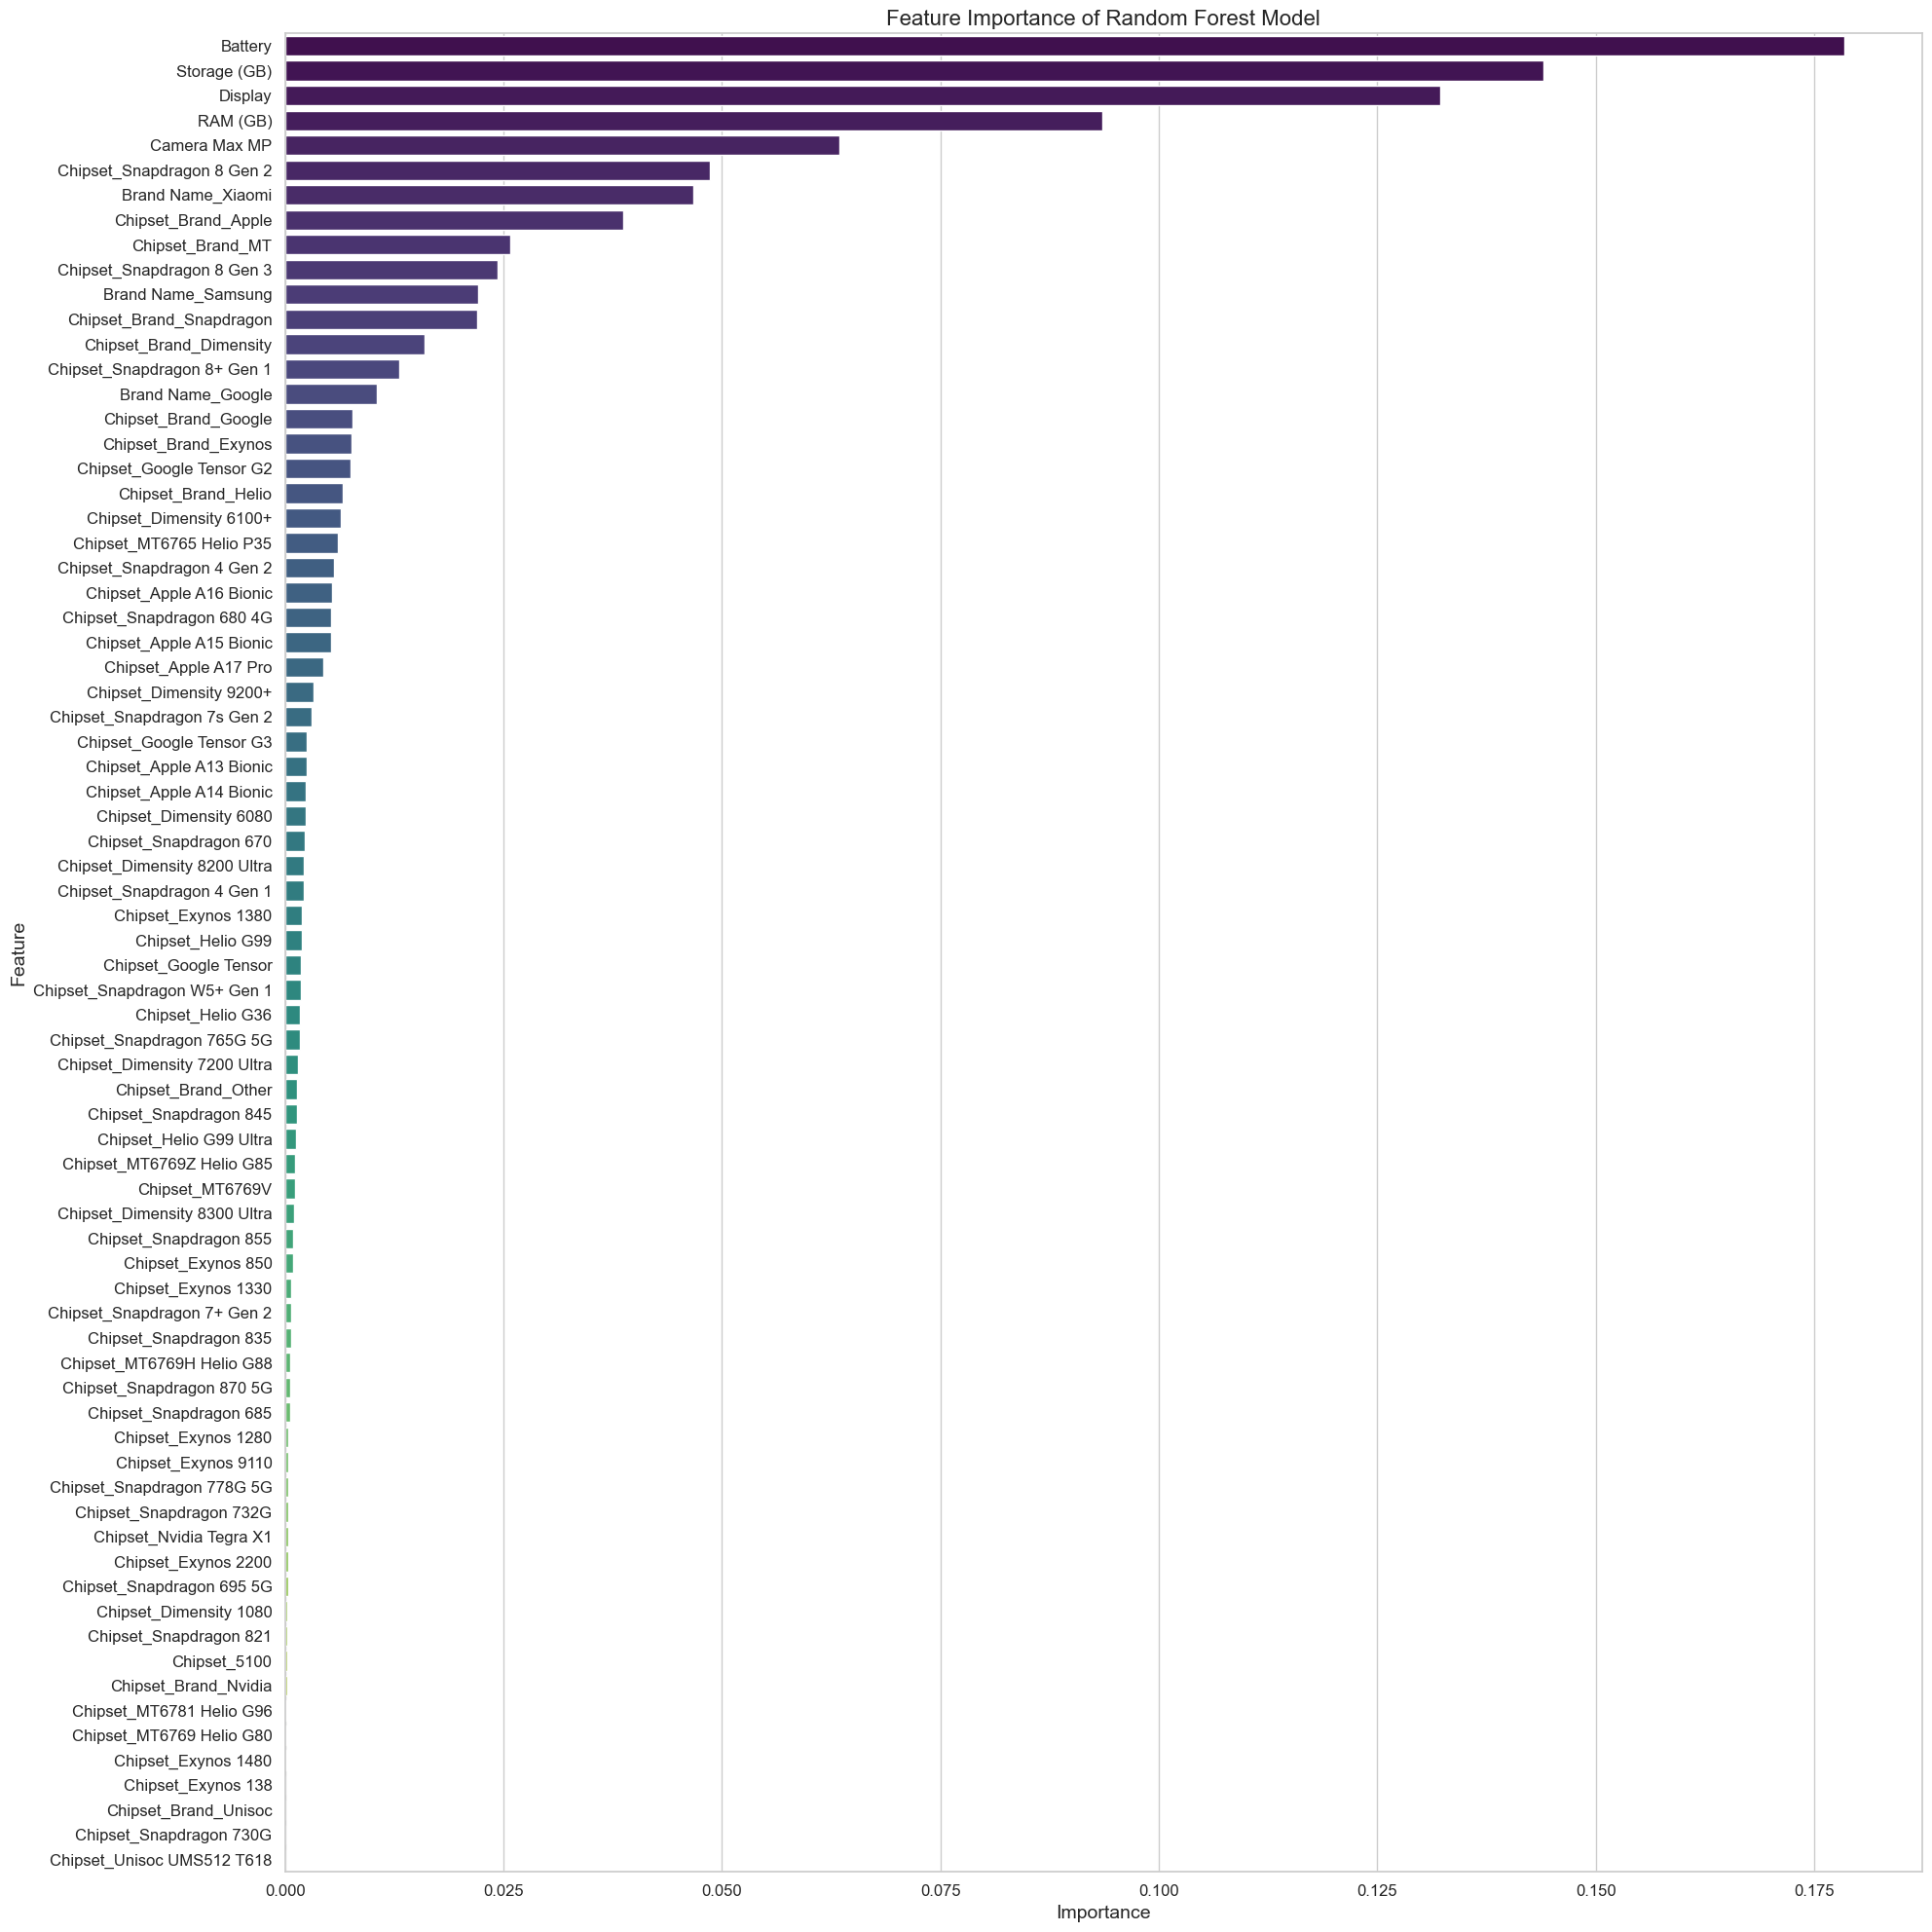

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the best Random Forest model to the training data
best_rf.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set seaborn style to whitegrid
sns.set(style="whitegrid")

# Create a matplotlib figure
plt.figure(figsize=(20, 20))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance of Random Forest Model', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

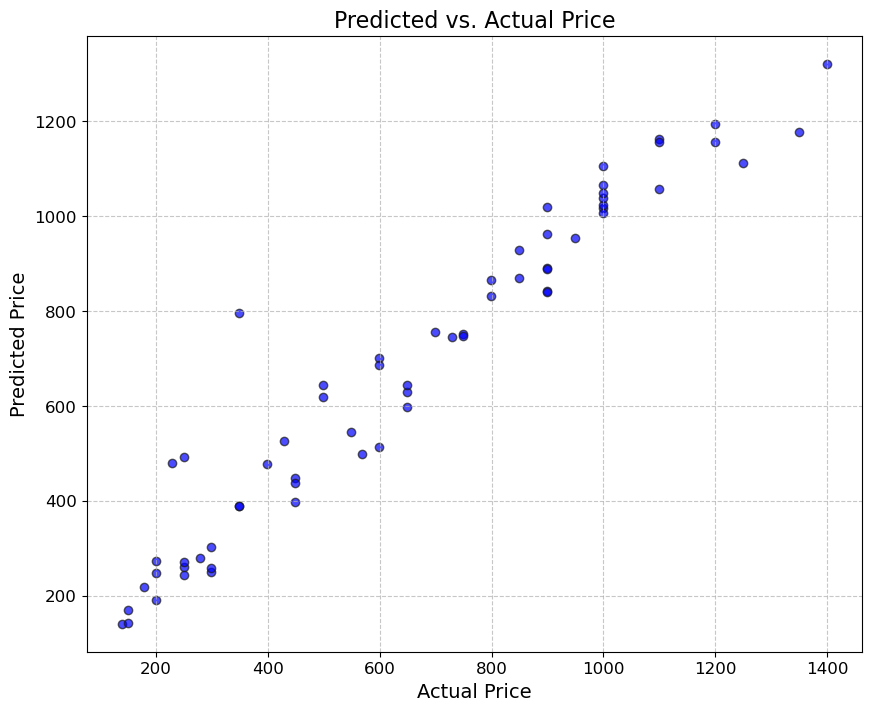

In [12]:
import matplotlib.pyplot as plt

plt.style.use('default')

# Generate a scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k')
plt.title('Predicted vs. Actual Price', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

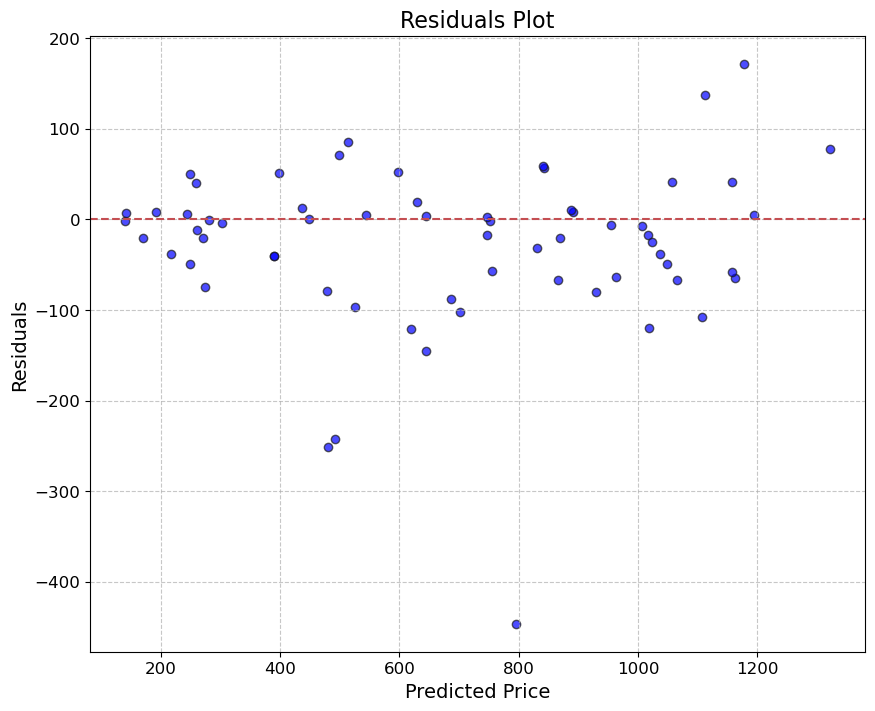

In [13]:
import matplotlib.pyplot as plt


plt.style.use('default')

# Generate a scatter plot of predicted prices vs. residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 8))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7, edgecolor='k')
plt.title('Residuals Plot', fontsize=16)
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

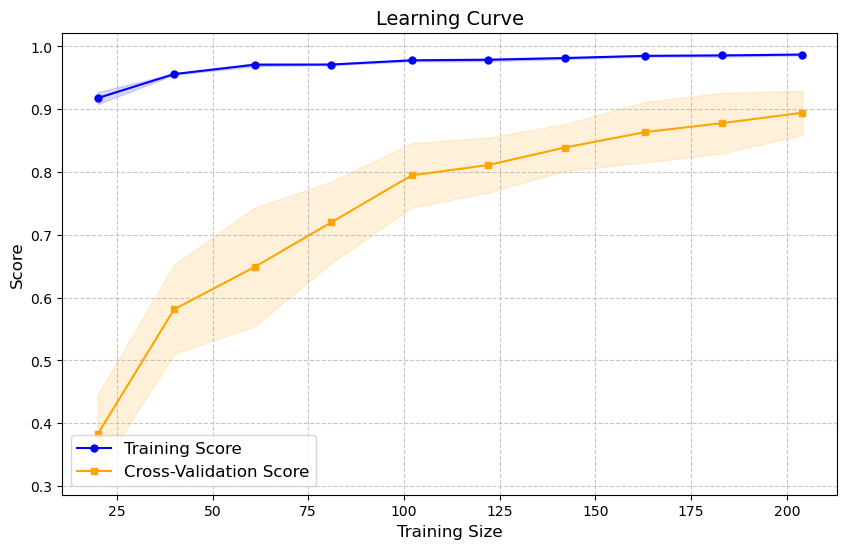

In [14]:
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score', linestyle='-')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='orange', marker='s', markersize=5, label='Cross-Validation Score', linestyle='-')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='orange')
    plt.title('Learning Curve', fontsize=14)
    plt.xlabel('Training Size', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


plot_learning_curve(best_rf, X_train, y_train)

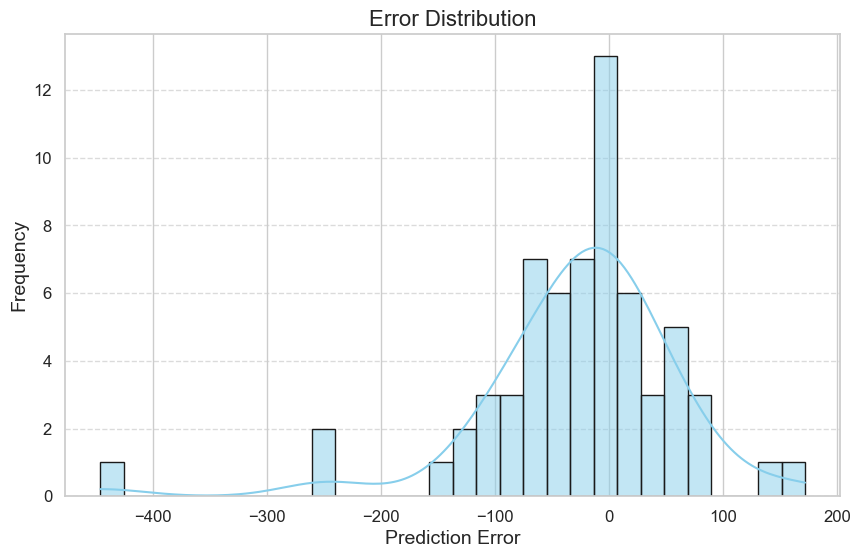

In [15]:
import seaborn as sns


sns.set(style="whitegrid")

# Generate a histogram of prediction errors (residuals)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='skyblue', edgecolor='k')
plt.title('Error Distribution', fontsize=16)
plt.xlabel('Prediction Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

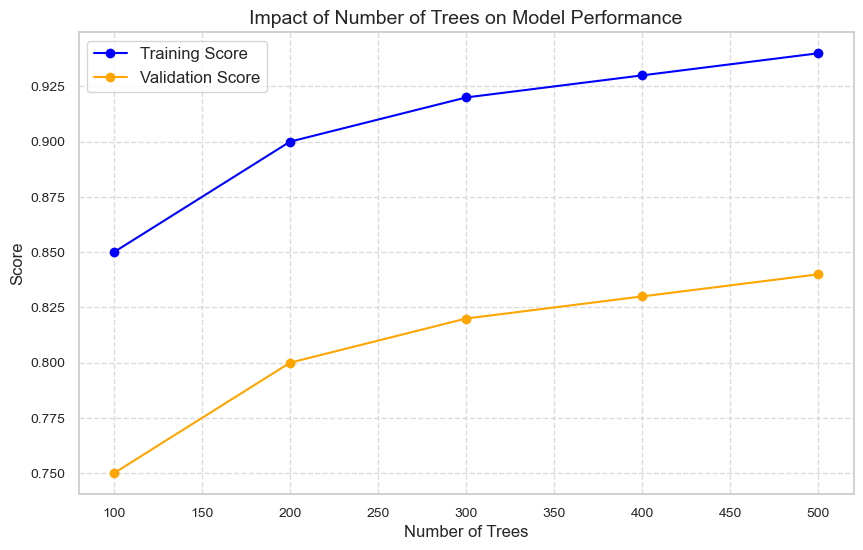

In [16]:
import matplotlib.pyplot as plt

# Define the best value of n_estimators obtained from GridSearchCV
best_n_estimators = grid_search.best_params_['n_estimators']

# Define a function to plot the impact of a parameter on model performance
def plot_parameter_impact(param_values, train_scores, test_scores, param_name):
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, train_scores, marker='o', color='blue', label='Training Score', linestyle='-')
    plt.plot(param_values, test_scores, marker='o', color='orange', label='Validation Score', linestyle='-')
    plt.title('Impact of {} on Model Performance'.format(param_name), fontsize=14)
    plt.xlabel(param_name, fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


param_values = [100, 200, 300, 400, 500]  
train_scores = [0.85, 0.9, 0.92, 0.93, 0.94]  
test_scores = [0.75, 0.8, 0.82, 0.83, 0.84]   


plot_parameter_impact(param_values, train_scores, test_scores, 'Number of Trees')
